The following example shows how to train a model. Get a list of training data csv file in the selected folder. Lessons learned so far:
- Training result is very sensitive to normalization. The normalization approach based on mean and variance does not work very well. Still need to manually set mean and variance.
- t-sne plot of adapter trace is an important flag of training result. 
- h net does not have to descent because phi net training strives to make it rise, while h net training itself tries to lower the loss
- Increase the h training frequency to fight against rising h 
- Increase alpha to push domain info to adapter
- Increase number of features to minimize MSE loss.
- ocassional small spike in cross entropy loss is possibly a sign that phi net become further domain invariant and may not be bad.
- at the late stage of training while both mse loss and cross entropy loss converge. May need to train h net every step to refine the optimization direction.
- Do not need to select the model at the end epoch. Select the epoch when the loss is reasonably low and stable. 
- RMS is a good indicator because it matches the least square form of loss function
- When the residual force is small, e.g. training disturbance force compensated by BEMT, disturbance normalization should scale up the label for better learning. 

Existing problem:
- The more classes, the harder to train. The difficulty comes from instability of loss_f and loss_c. alpha is hard to tune.
- t-sne gets worse as epoch grows and the cross entropy loss remains the same. 

In [1]:
import os
import matplotlib.pyplot as plt

import training_manager

current_dir = os.getcwd()
training_subfolder = "wind_near_wall_bemt_fitting"
# training_subfolder = "wind_near_wall_bemt_fitting_validation"
# training_subfolder = "wind_near_wall_bemt_fitting_zero"
# training_subfolder = "nf_training_back2back"
# validation_subfolder = "nf_validation_back2back"
validation_subfolder = "wind_near_wall_bemt_fitting_validation"
# validation_subfolder = "wind_near_wall_bemt_fitting_validation_sinusoidal"
# validation_subfolder = "wind_near_wall_bemt_fitting_zero_validation"

def generate_data_list(subfolder):
    """
    Generate a list of data files in the specified subfolder.
    """
    folder_path = os.path.join(os.path.dirname(current_dir), "data", "training", subfolder)
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Filter out files that do not end with .csv
    file_names = [f for f in file_names if f.endswith('.csv')]
    # add subfolder to the file names
    data_list = [os.path.join(subfolder, f) for f in file_names]
    return data_list

data_list = generate_data_list(training_subfolder)
print("Training Data List:")
for data in data_list:
    print(data)

validation_list = generate_data_list(validation_subfolder)
print("\nValidation Data List:")
for data in validation_list:
    print(data)

path1 = os.path.join(training_subfolder, "input_label_map_disturbance_force_label.yaml")

Training Data List:
wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_z0_0_d100_4_fitting.csv
wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_z3_0_d100_4_fitting.csv
wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_z5_0_d100_4_fitting.csv
wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_zn3_0_d100_4_fitting.csv
wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_zn5_0_d100_4_fitting.csv
wind_near_wall_bemt_fitting\test_wind_near_wall_xn1_0_y0_0_z0_0_d100_4_fitting.csv
wind_near_wall_bemt_fitting\test_wind_near_wall_xn1_0_y0_0_z3_0_d100_4_fitting.csv
wind_near_wall_bemt_fitting\test_wind_near_wall_xn1_0_y0_0_z5_0_d100_4_fitting.csv
wind_near_wall_bemt_fitting\test_wind_near_wall_xn1_0_y0_0_zn3_0_d100_4_fitting.csv
wind_near_wall_bemt_fitting\test_wind_near_wall_xn1_0_y0_0_zn5_0_d100_4_fitting.csv
wind_near_wall_bemt_fitting\test_wind_near_wall_xn3_0_y0_0_z0_0_d100_4_fitting.csv
wind_near_wall_bemt_fitting\test_wind_near_wall_xn3_0_y0_0_z3_0_d100

- Make sure the input_label_map_disturbance_force_label.yaml is in the selected folder. This yaml defines which fields are model inputs and which fields are data labels. 
- Make sure the column_map.yaml is in the selected folder. This yaml maps data fields to the corresponding column in the csv files. This file can be auto-generated by `Simulation\simulation\training_data_user_guide.ipynb`
- If this is the first time to train on this data. The script will normalize the data and save the normalization parameters into a file.

Setting up data factory...
Loading normalization params file from
..\data\training\wind_near_wall_bemt_fitting\normalization_params.yaml
Using 1501 samples from the dataset for training from source file: wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_z0_0_d100_4_fitting.csv
Using 1501 samples from the dataset for training from source file: wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_z3_0_d100_4_fitting.csv
Using 1501 samples from the dataset for training from source file: wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_z5_0_d100_4_fitting.csv
Using 1501 samples from the dataset for training from source file: wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_zn3_0_d100_4_fitting.csv
Using 1501 samples from the dataset for training from source file: wind_near_wall_bemt_fitting\test_wind_near_wall_x0_0_y0_0_zn5_0_d100_4_fitting.csv
Using 1501 samples from the dataset for training from source file: wind_near_wall_bemt_fitting\test_wind_near_wall_x

c:\YimingVirtualDDrive\7_workSpace\repo\neural-fly\Simulation\learning\model.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("input_mean", torch.tensor(input_mean, dtype=torch.float32))
c:\YimingVirtualDDrive\7_workSpace\repo\neural-fly\Simulation\learning\model.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("input_scale", torch.tensor(input_scale, dtype=torch.float32))


[1] loss: 0.97 loss_validation: 1.59
[101] loss: 0.74 loss_validation: 1.43
[201] loss: 0.71 loss_validation: 1.43
[301] loss: 0.71 loss_validation: 1.41


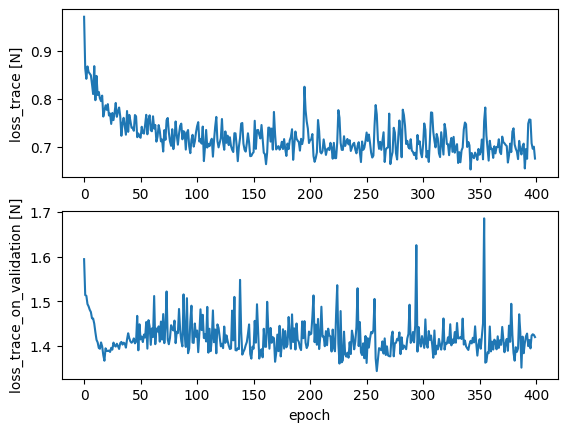

In [2]:
# use the data from previous section to train the model

factory = training_manager.PipelineFactory(training_manager.ModelArchitecture.ROTOR_NET)
manager = factory.make_training_pipeline()
manager.set_up(
    training_data_menu=data_list,
    # training_data_menu=data_list[:4],    # use small data list for quick testing
    validation_data_menu=validation_list[-1:],
    input_label_map_file=path1,
    can_inspect_data=False
)
manager.train()

plt.show()  

Inspect data in the data list.

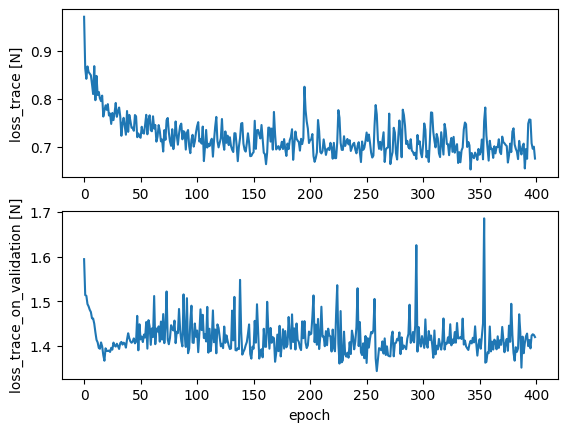

In [3]:
# trainer_instance.inspect_data(data_list[:2])
manager.show_result_only()

After training, we can save the model in the following way.

In [4]:
model_name = training_subfolder
manager.save_model(model_name)

Model saved to model\wind_near_wall_bemt_fitting.pth


Test the model using the test set.

test Data List:
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_z10_0_d0_5_validation.csv
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_z1_0_d0_5_validation.csv
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_z4_0_d0_5_validation.csv
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_zn10_0_d0_5_validation.csv
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_zn1_0_d0_5_validation.csv
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_zn4_0_d0_5_validation.csv
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_xn2_0_y0_0_z10_0_d0_5_validation.csv
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_xn2_0_y0_0_z1_0_d0_5_validation.csv
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_xn2_0_y0_0_z4_0_d0_5_validation.csv
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_xn2_0_y0_0_zn10_0_d0_5_validation.csv
wind_near_wall_bemt_fitting_vali

c:\YimingVirtualDDrive\7_workSpace\repo\neural-fly\Simulation\learning\model.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("input_mean", torch.tensor(input_mean, dtype=torch.float32))
c:\YimingVirtualDDrive\7_workSpace\repo\neural-fly\Simulation\learning\model.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("input_scale", torch.tensor(input_scale, dtype=torch.float32))


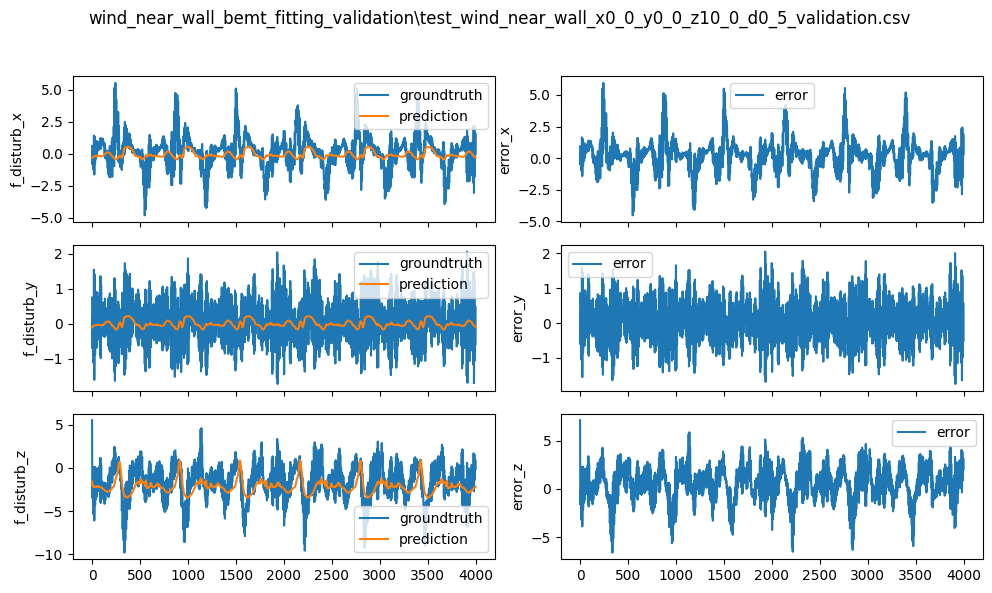

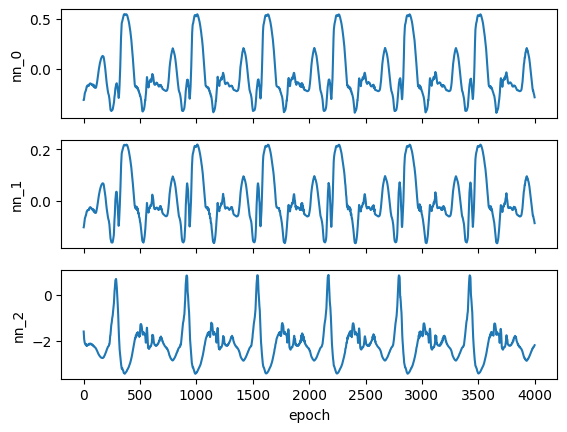

prediction: tensor([[-0.0293,  0.0825, -0.1733],
        [-0.0344,  0.0785, -0.2211],
        [-0.0387,  0.0752, -0.2766],
        ...,
        [-0.2583, -0.0796, -0.0485],
        [-0.2622, -0.0823, -0.0597],
        [-0.2664, -0.0854, -0.0782]])


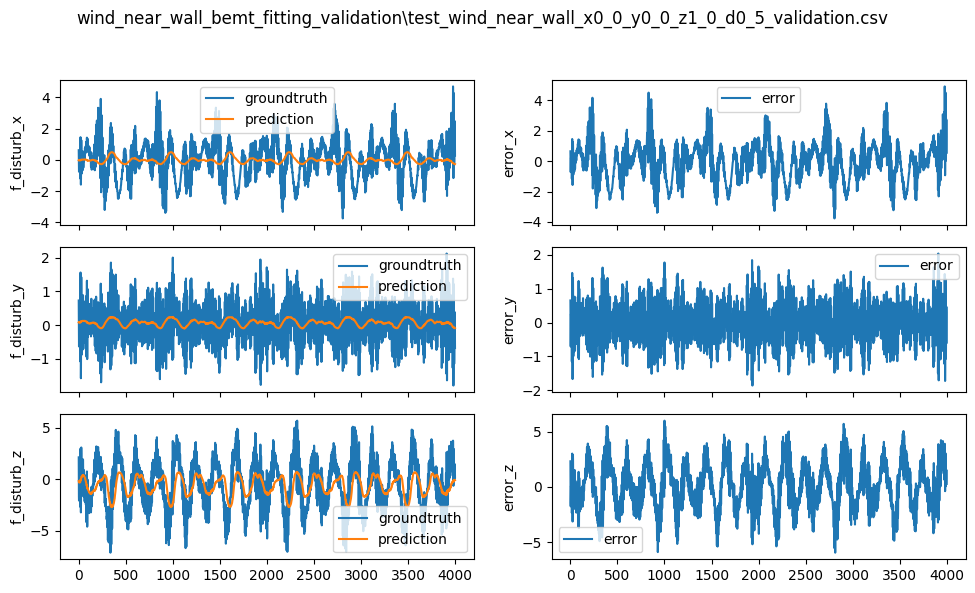

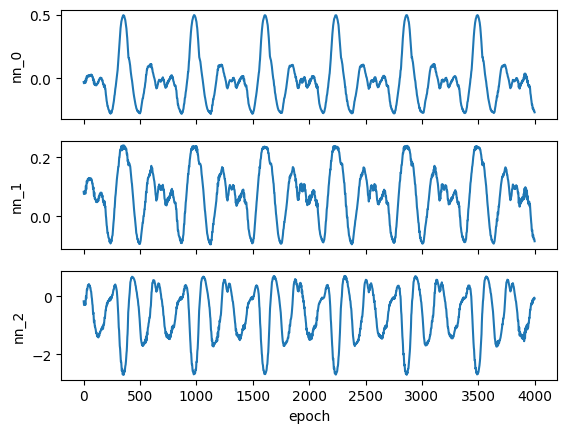

prediction: tensor([[-0.1038,  0.0322, -0.5035],
        [-0.1110,  0.0260, -0.5909],
        [-0.1170,  0.0212, -0.6843],
        ...,
        [-0.2838, -0.0992, -0.2833],
        [-0.2894, -0.1031, -0.3014],
        [-0.2949, -0.1068, -0.3239]])


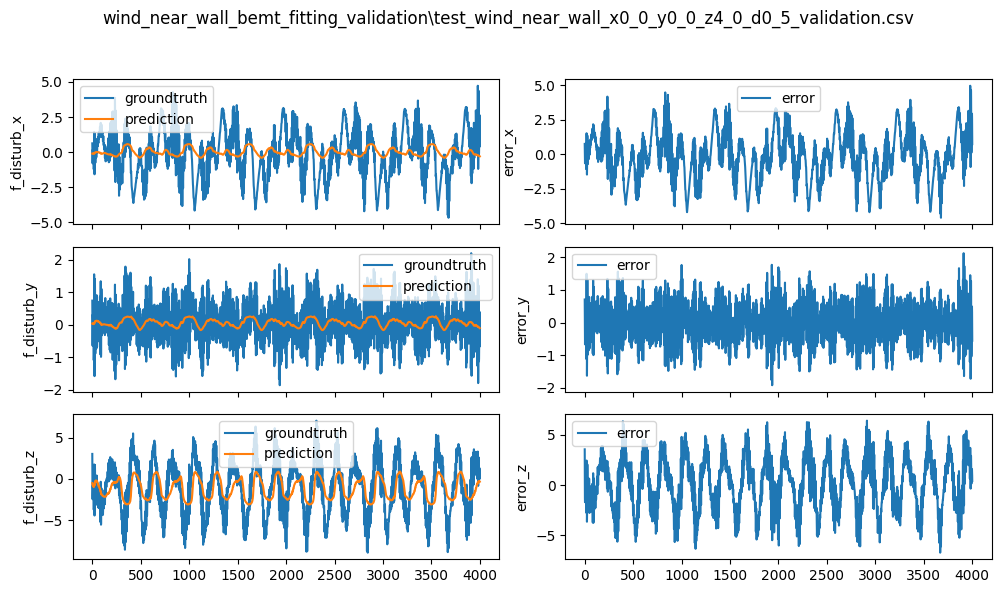

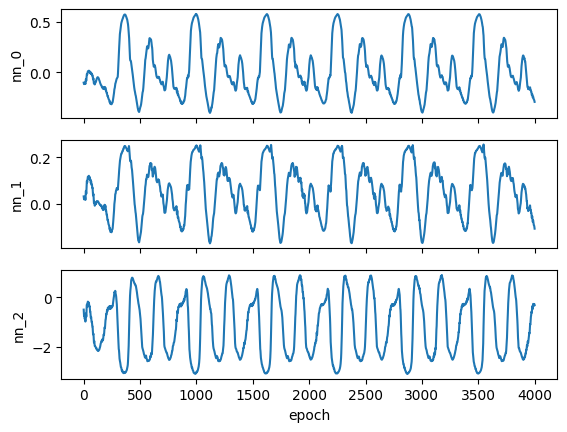

prediction: tensor([[ 0.0307,  0.0248, -1.5517],
        [ 0.0519,  0.0324, -1.6549],
        [ 0.0720,  0.0399, -1.7381],
        ...,
        [-0.0838, -0.0286, -1.4283],
        [-0.0902, -0.0314, -1.3824],
        [-0.0953, -0.0335, -1.3423]])


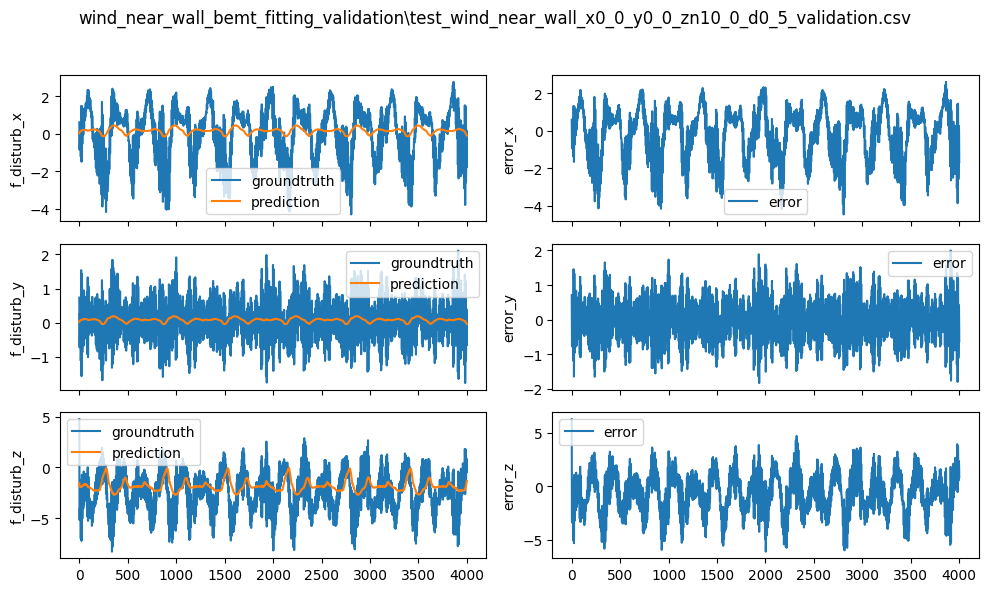

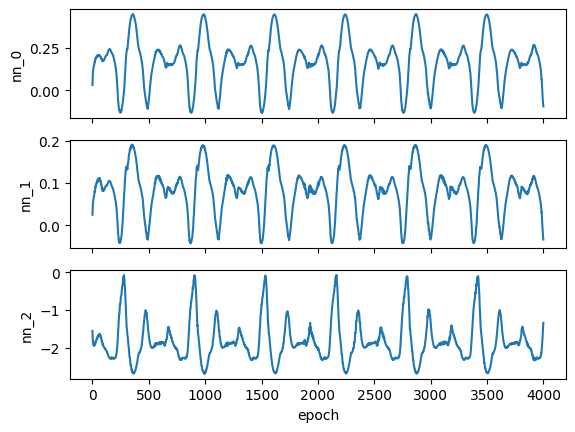

prediction: tensor([[ 0.0005,  0.0942, -0.1351],
        [-0.0062,  0.0890, -0.1743],
        [-0.0111,  0.0849, -0.2184],
        ...,
        [-0.2284, -0.0615, -0.0392],
        [-0.2317, -0.0638, -0.0472],
        [-0.2354, -0.0665, -0.0611]])


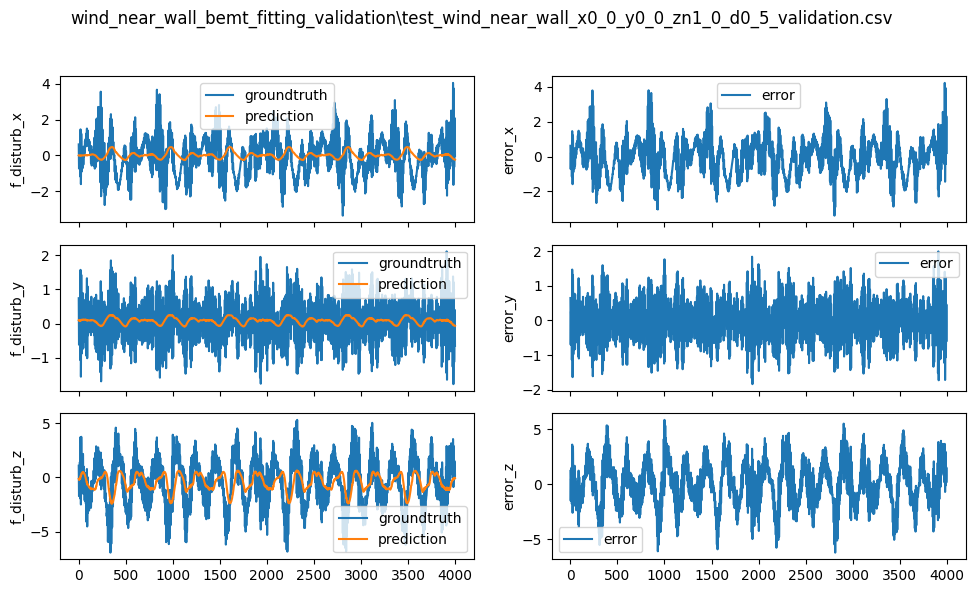

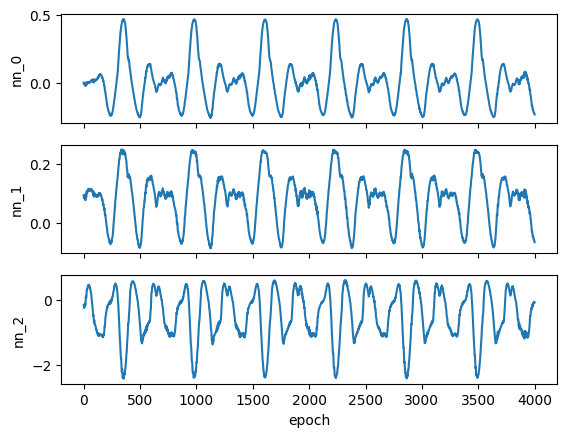

prediction: tensor([[-0.0047,  0.0675, -0.4698],
        [-0.0091,  0.0634, -0.5156],
        [-0.0134,  0.0588, -0.5816],
        ...,
        [-0.1891, -0.0438, -0.1373],
        [-0.1932, -0.0461, -0.1385],
        [-0.1965, -0.0480, -0.1434]])


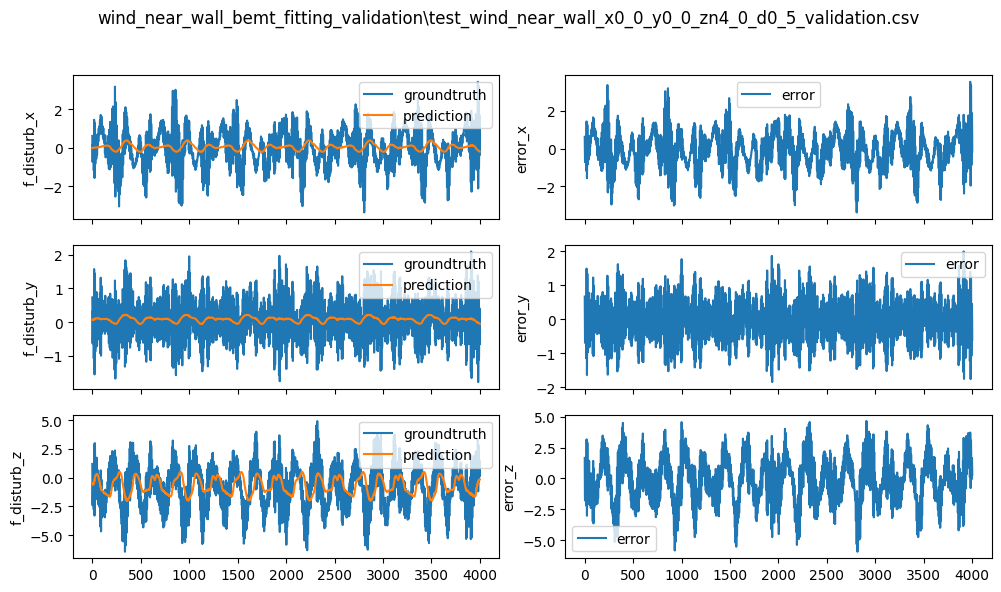

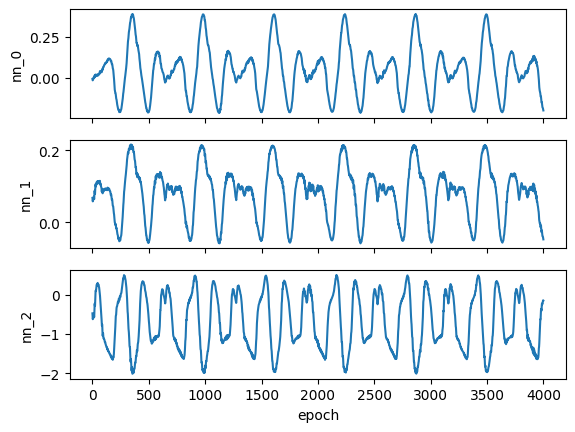

prediction: tensor([[-0.3012, -0.0976, -1.6052],
        [-0.3022, -0.0963, -1.7085],
        [-0.2980, -0.0931, -1.7980],
        ...,
        [-0.2402, -0.0673, -2.2651],
        [-0.2432, -0.0686, -2.2665],
        [-0.2461, -0.0699, -2.2689]])


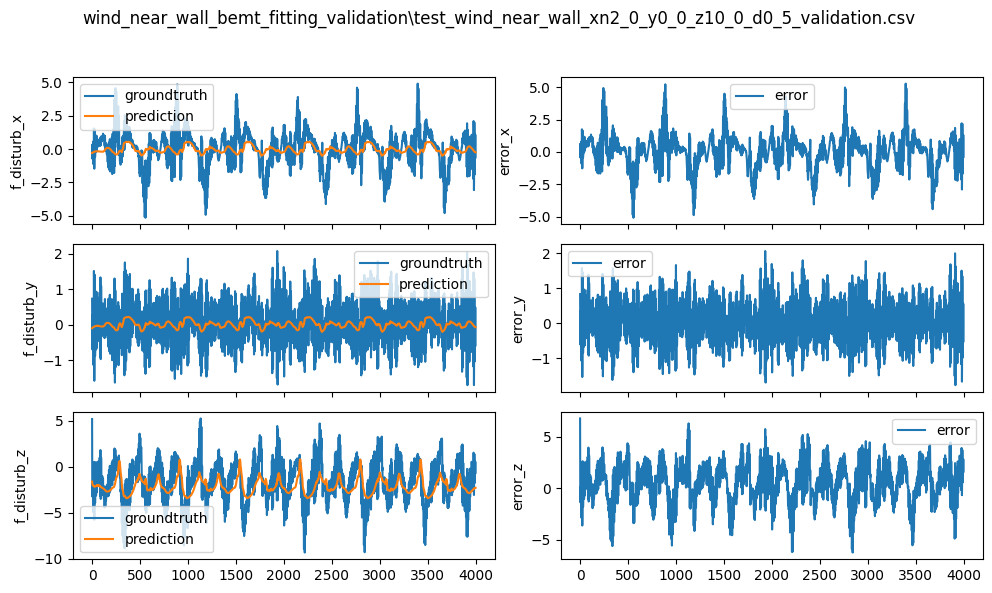

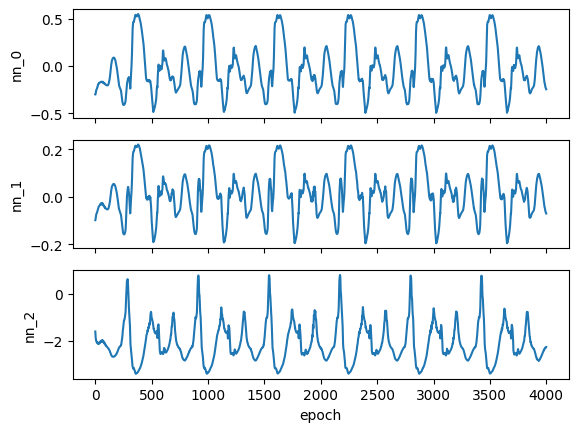

prediction: tensor([[-0.0228,  0.0860, -0.1824],
        [-0.0285,  0.0816, -0.2358],
        [-0.0329,  0.0782, -0.2927],
        ...,
        [-0.2518, -0.0771, -0.1231],
        [-0.2554, -0.0796, -0.1318],
        [-0.2592, -0.0822, -0.1460]])


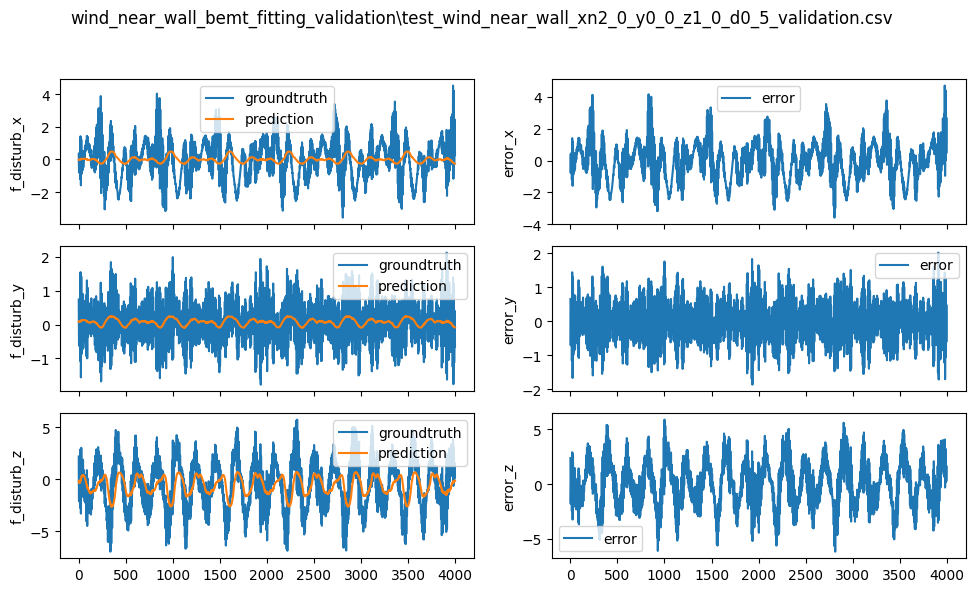

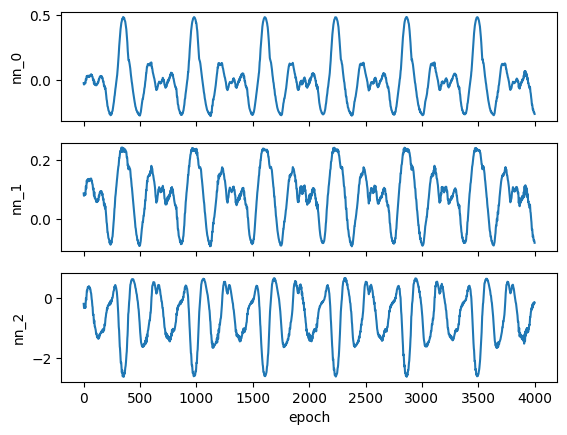

prediction: tensor([[-0.0955,  0.0379, -0.4959],
        [-0.1020,  0.0322, -0.5981],
        [-0.1078,  0.0275, -0.7112],
        ...,
        [-0.2902, -0.1039, -0.3870],
        [-0.2931, -0.1058, -0.3855],
        [-0.2966, -0.1079, -0.3915]])


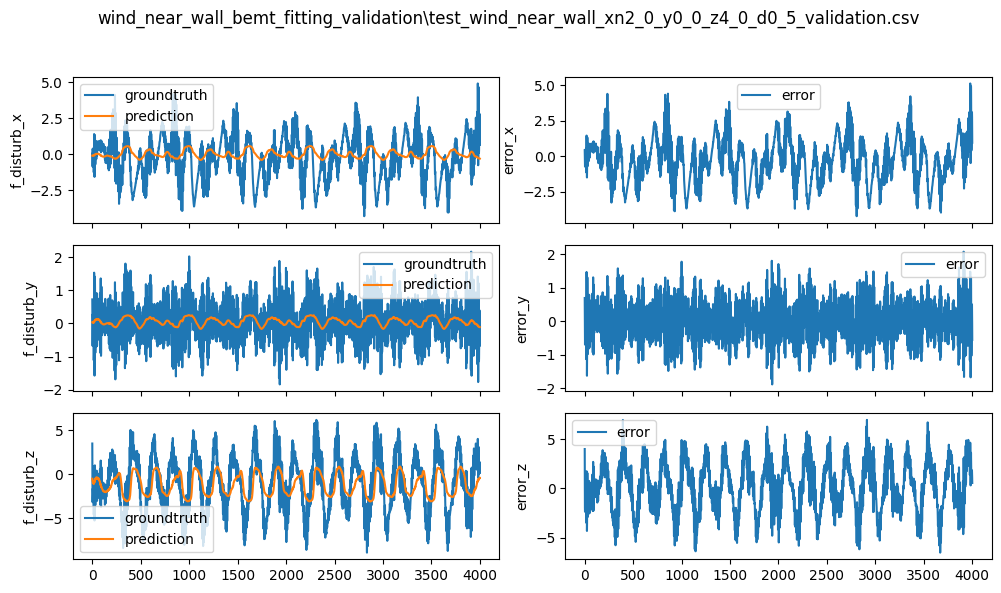

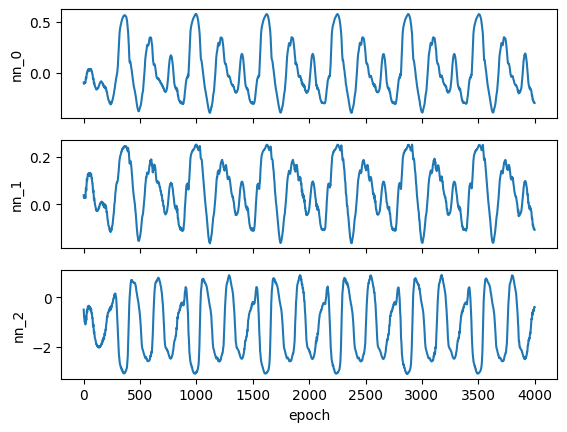

prediction: tensor([[ 0.0495,  0.0317, -1.6001],
        [ 0.0688,  0.0386, -1.6930],
        [ 0.0851,  0.0446, -1.7635],
        ...,
        [-0.0823, -0.0283, -1.3304],
        [-0.0882, -0.0309, -1.2870],
        [-0.0942, -0.0331, -1.2466]])


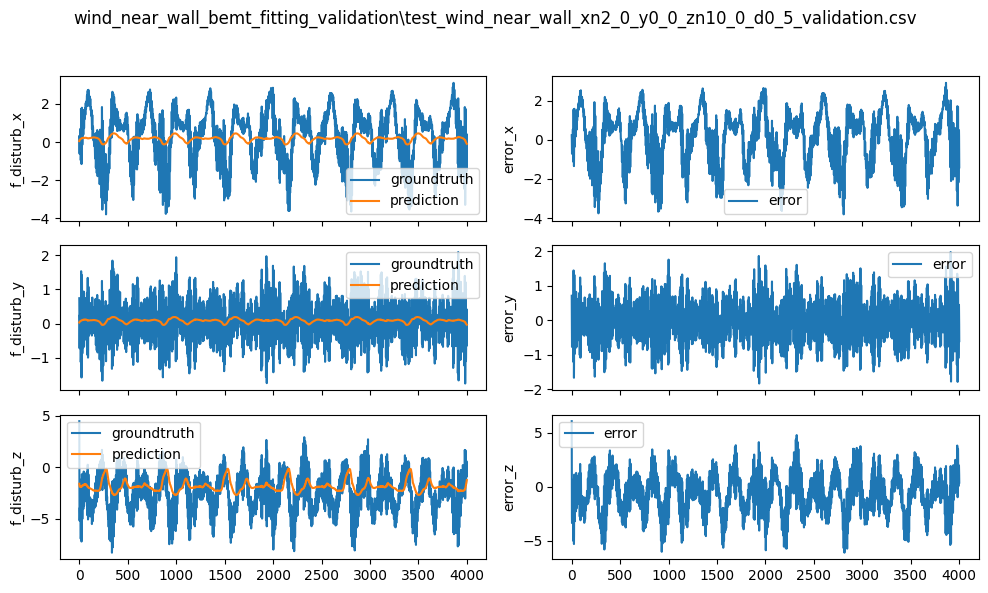

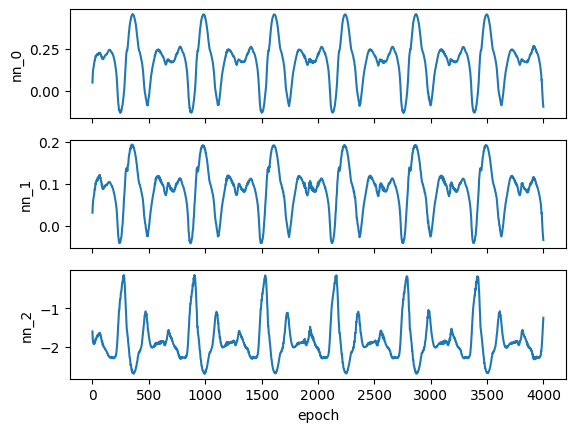

prediction: tensor([[ 0.0050,  0.0961, -0.1629],
        [-0.0013,  0.0911, -0.2026],
        [-0.0070,  0.0863, -0.2528],
        ...,
        [-0.2276, -0.0610, -0.0348],
        [-0.2310, -0.0633, -0.0424],
        [-0.2349, -0.0660, -0.0559]])


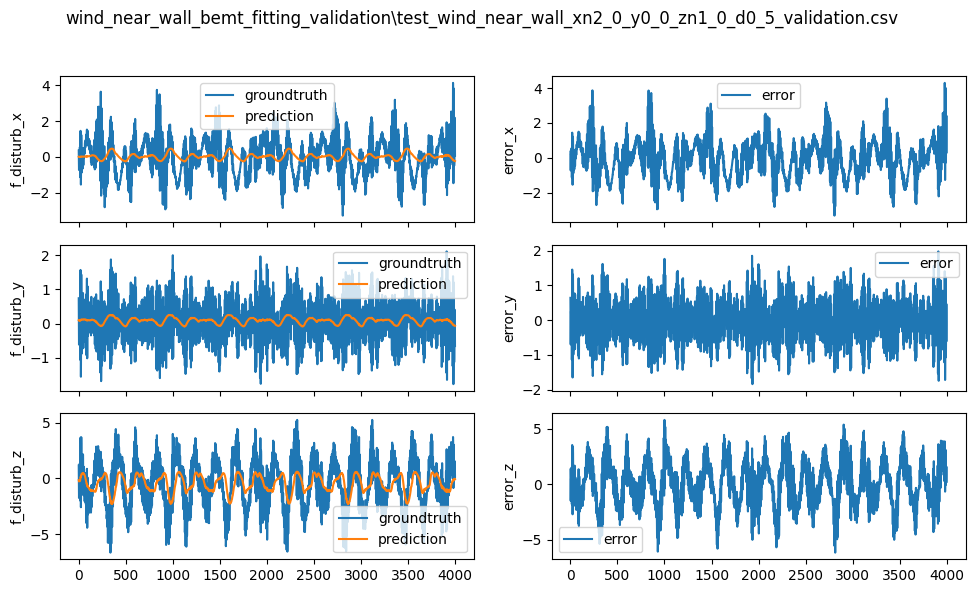

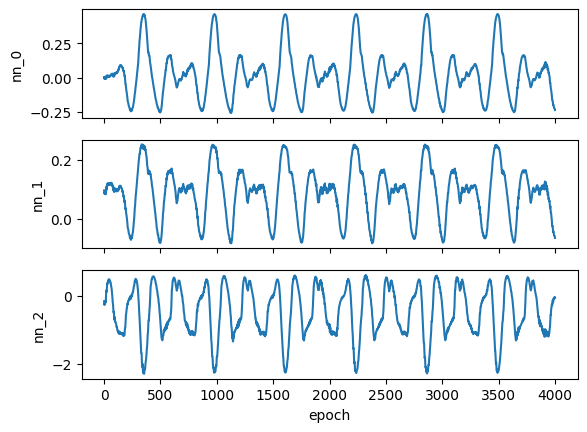

prediction: tensor([[ 0.0032,  0.0699, -0.5295],
        [-0.0029,  0.0647, -0.5832],
        [-0.0028,  0.0615, -0.6502],
        ...,
        [-0.1879, -0.0431, -0.1143],
        [-0.1920, -0.0454, -0.1158],
        [-0.1953, -0.0473, -0.1208]])


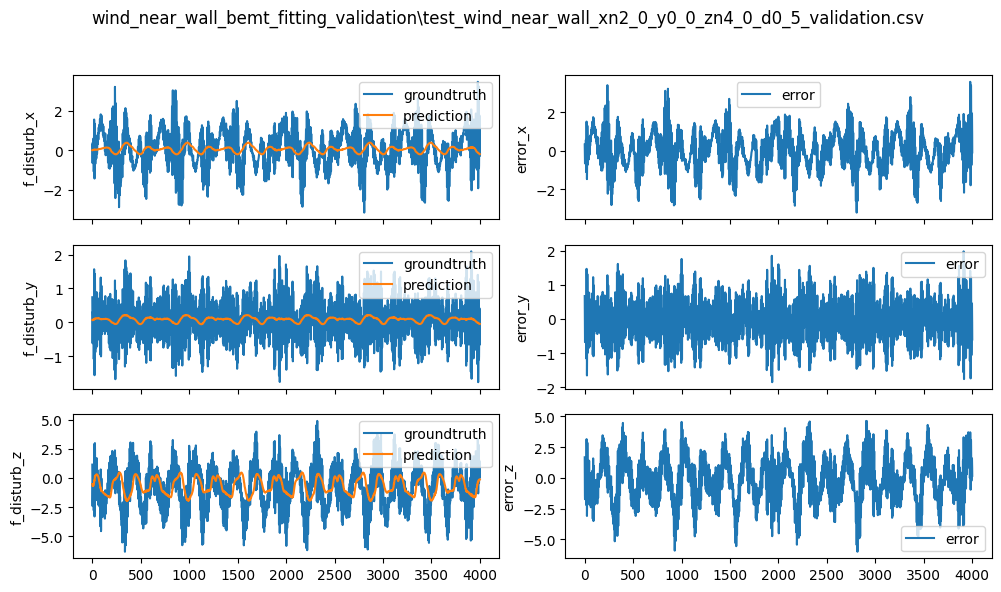

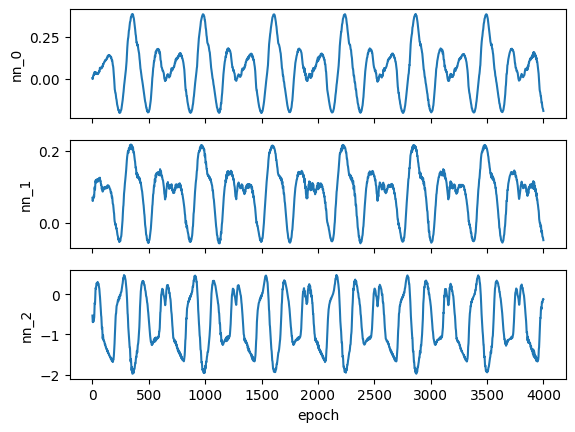

prediction: tensor([[-0.2879, -0.0913, -1.5994],
        [-0.2891, -0.0907, -1.6980],
        [-0.2853, -0.0880, -1.7808],
        ...,
        [-0.2826, -0.0846, -2.0680],
        [-0.2913, -0.0884, -2.0533],
        [-0.2998, -0.0921, -2.0368]])


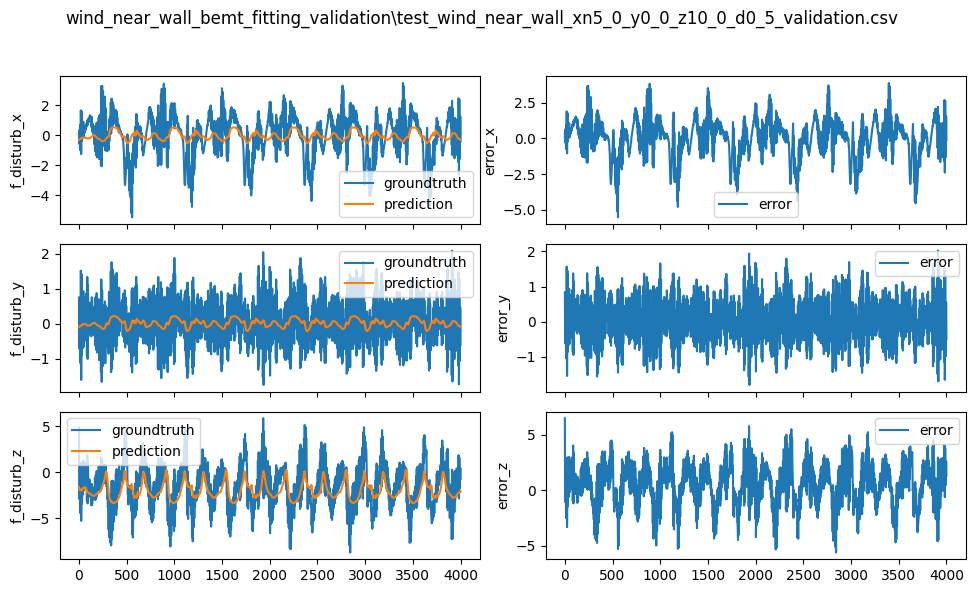

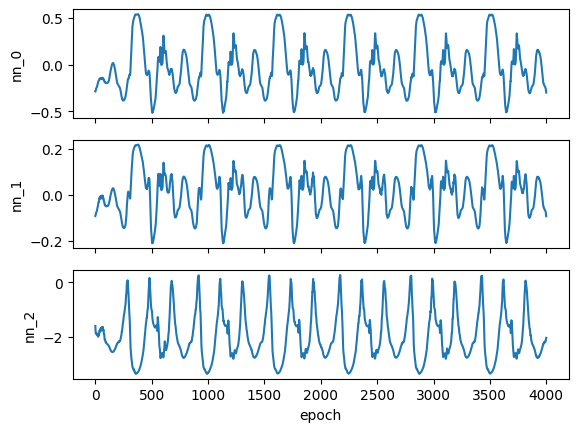

prediction: tensor([[-0.0153,  0.0898, -0.2129],
        [-0.0207,  0.0855, -0.2700],
        [-0.0248,  0.0821, -0.3311],
        ...,
        [-0.2356, -0.0687, -0.2278],
        [-0.2395, -0.0714, -0.2359],
        [-0.2436, -0.0742, -0.2520]])


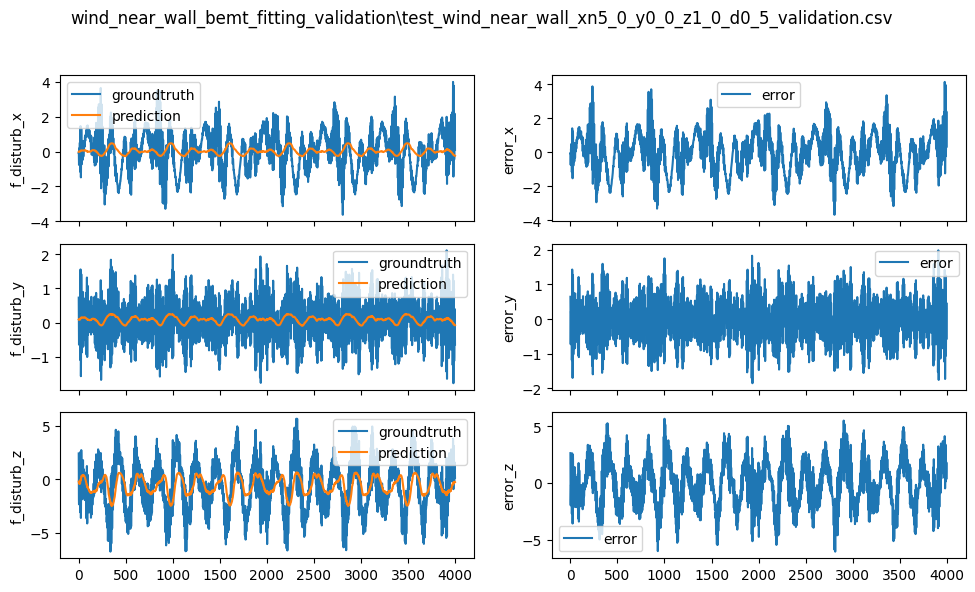

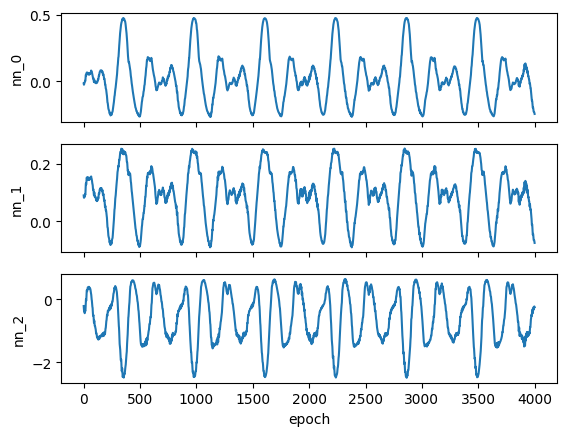

prediction: tensor([[-0.0841,  0.0460, -0.4892],
        [-0.0915,  0.0397, -0.5927],
        [-0.0982,  0.0338, -0.7133],
        ...,
        [-0.2770, -0.0959, -0.6230],
        [-0.2801, -0.0979, -0.6328],
        [-0.2837, -0.1001, -0.6545]])


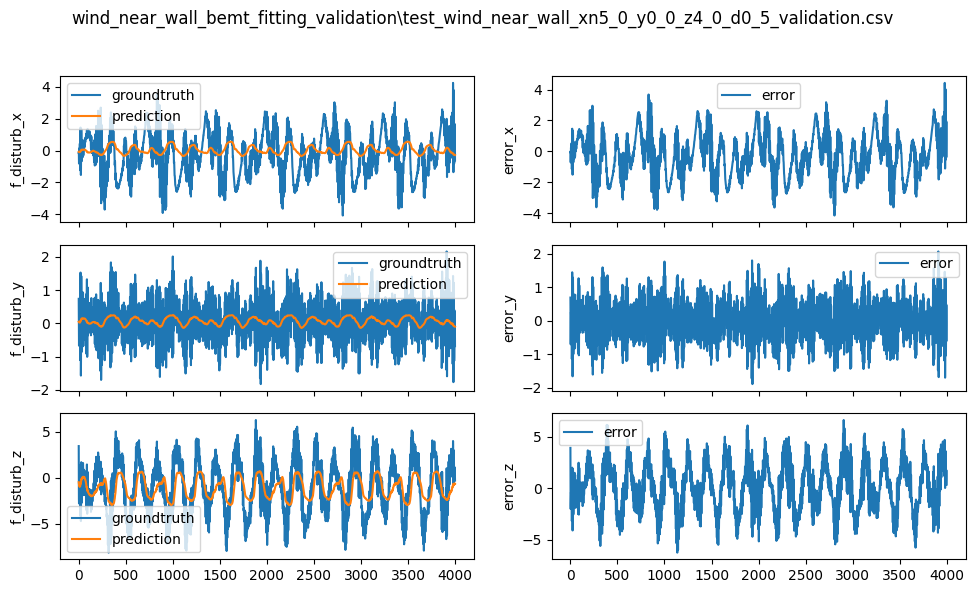

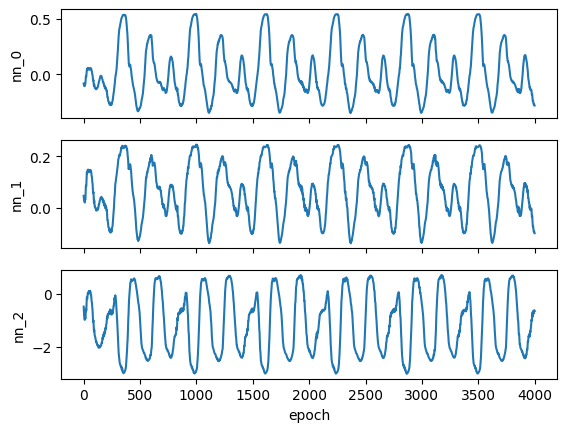

prediction: tensor([[ 0.0772,  0.0422, -1.6619],
        [ 0.0946,  0.0484, -1.7453],
        [ 0.1017,  0.0508, -1.7903],
        ...,
        [-0.0884, -0.0309, -1.1826],
        [-0.0962, -0.0339, -1.1307],
        [-0.0989, -0.0348, -1.0987]])


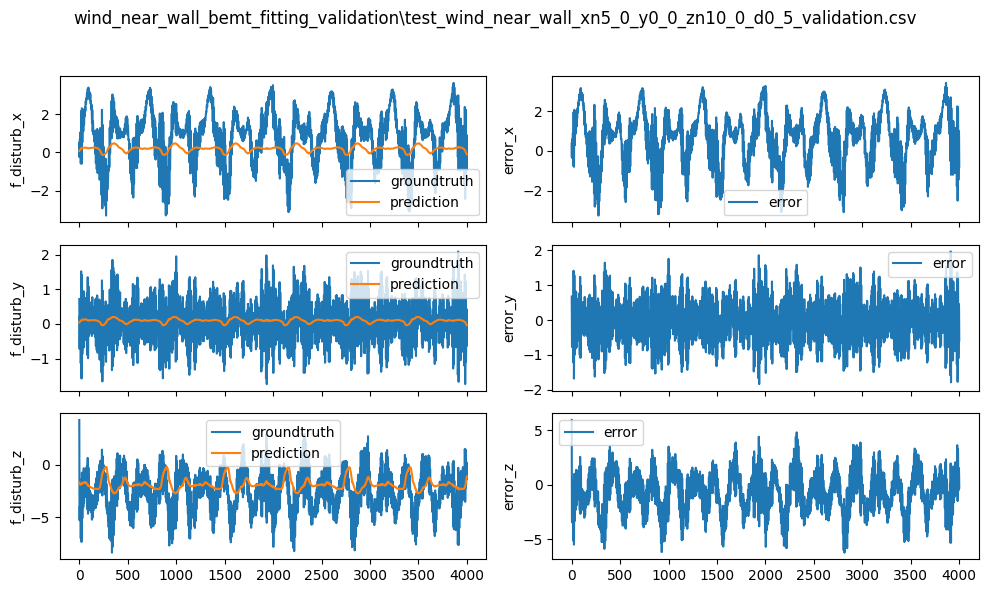

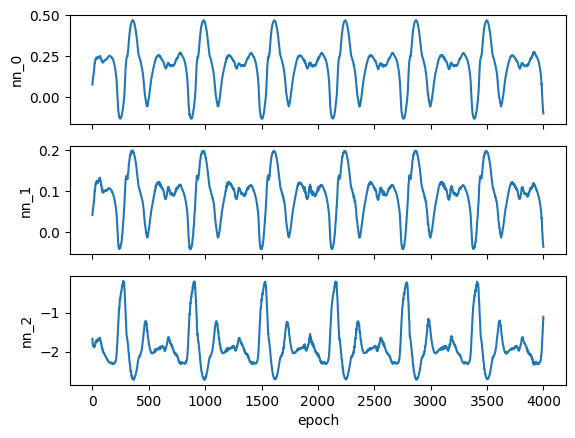

prediction: tensor([[ 0.0124,  0.0989, -0.2146],
        [ 0.0063,  0.0940, -0.2619],
        [ 0.0016,  0.0889, -0.3253],
        ...,
        [-0.2125, -0.0535, -0.1141],
        [-0.2161, -0.0558, -0.1213],
        [-0.2197, -0.0582, -0.1341]])


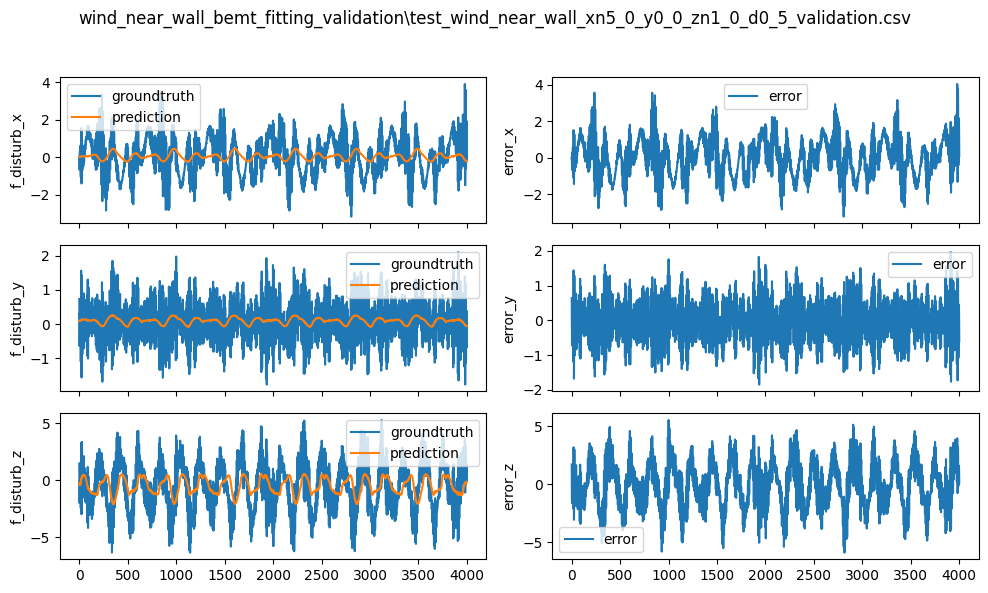

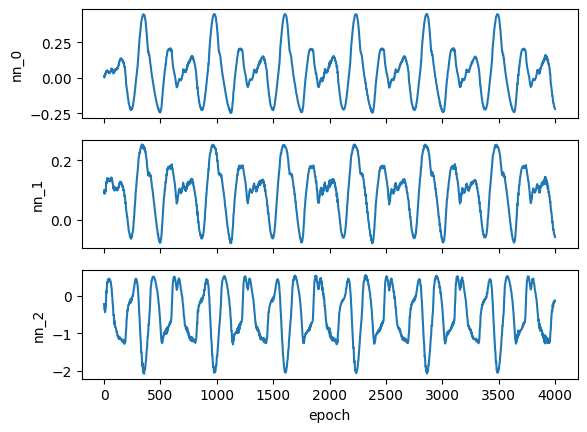

prediction: tensor([[ 0.0207,  0.0749, -0.6330],
        [ 0.0168,  0.0703, -0.6893],
        [ 0.0216,  0.0683, -0.7625],
        ...,
        [-0.1825, -0.0403, -0.1086],
        [-0.1867, -0.0427, -0.1114],
        [-0.1903, -0.0449, -0.1184]])


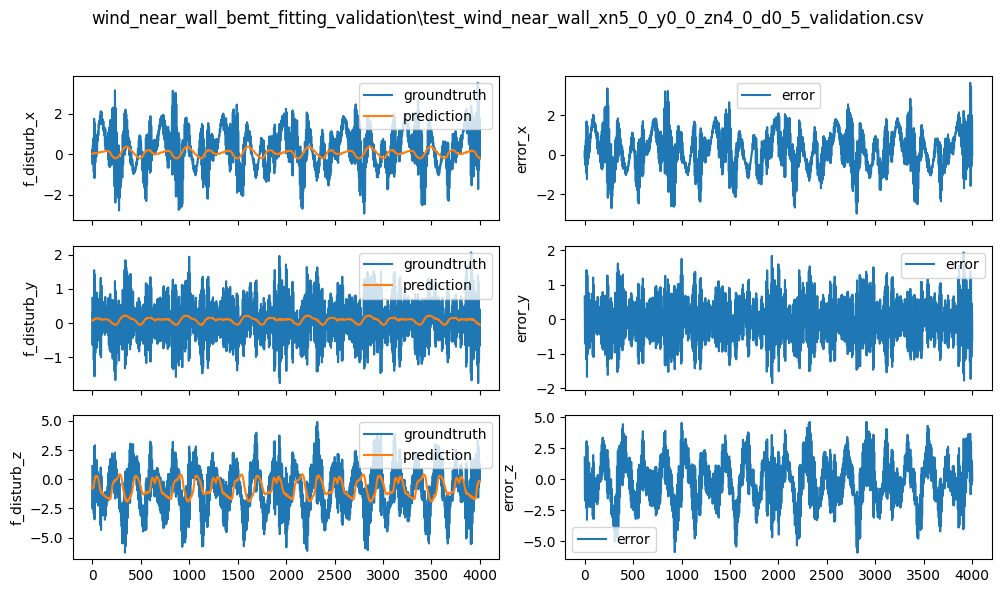

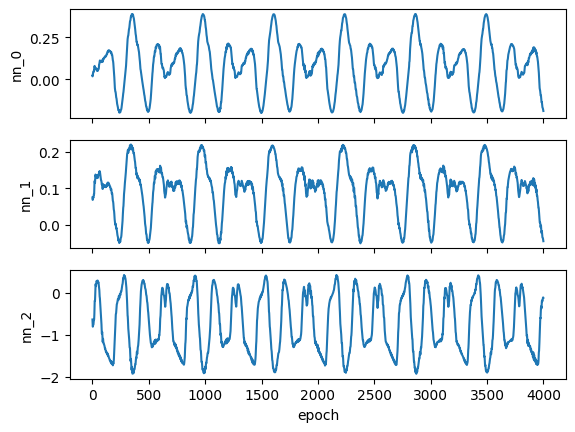

average rms for dim 0: 1.2098002235435796
average rms for dim 1: 0.5480312777733334
average rms for dim 2: 1.991958416460979


c:\YimingVirtualDDrive\7_workSpace\repo\neural-fly\Simulation\learning\validator.py:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


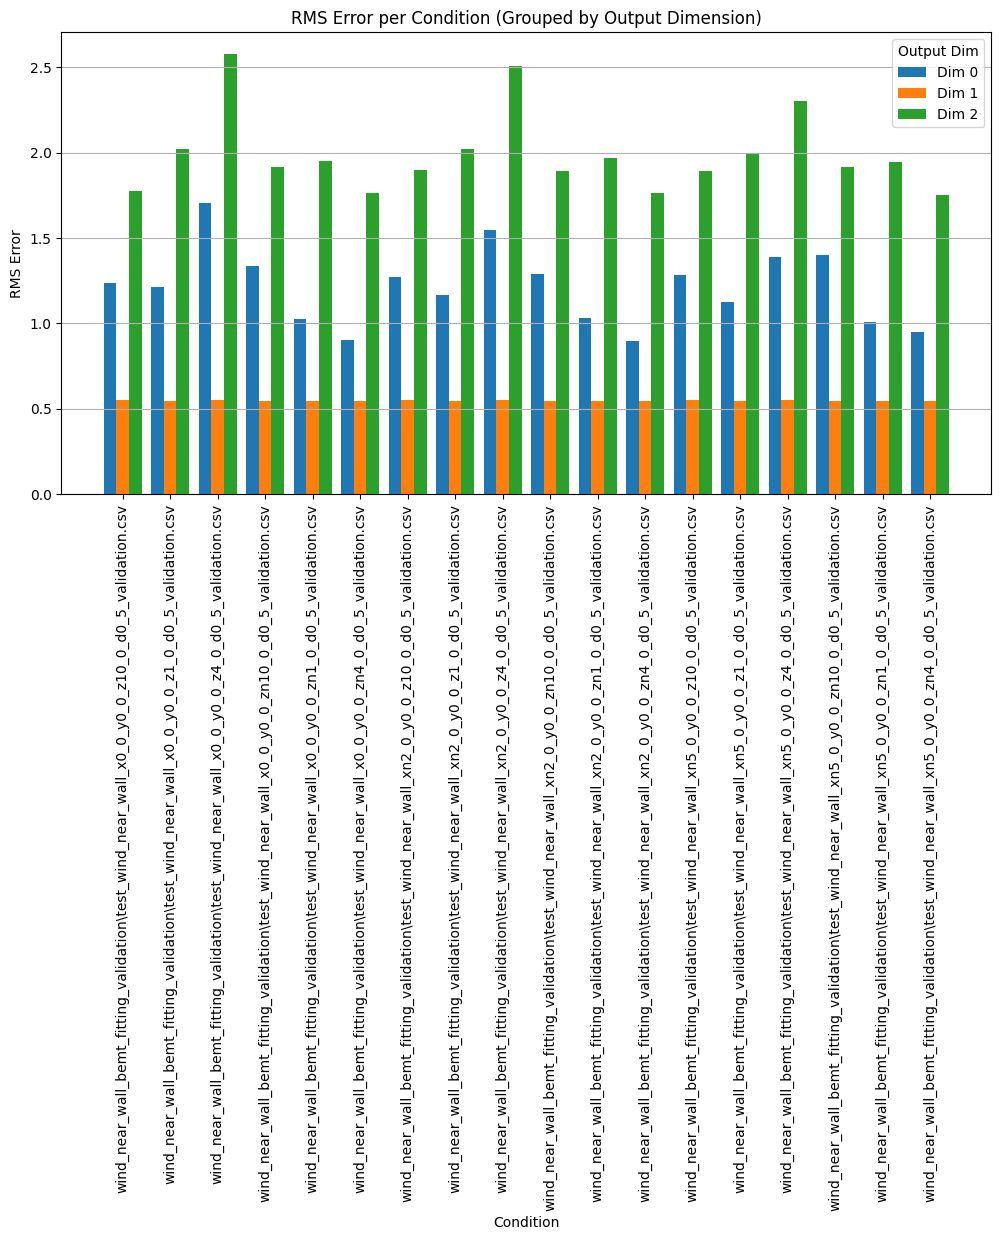

average mse for dim 0: 1.5099213707257033
average mse for dim 1: 0.3003445664687782
average mse for dim 2: 4.0209878557487135


c:\YimingVirtualDDrive\7_workSpace\repo\neural-fly\Simulation\learning\validator.py:110: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


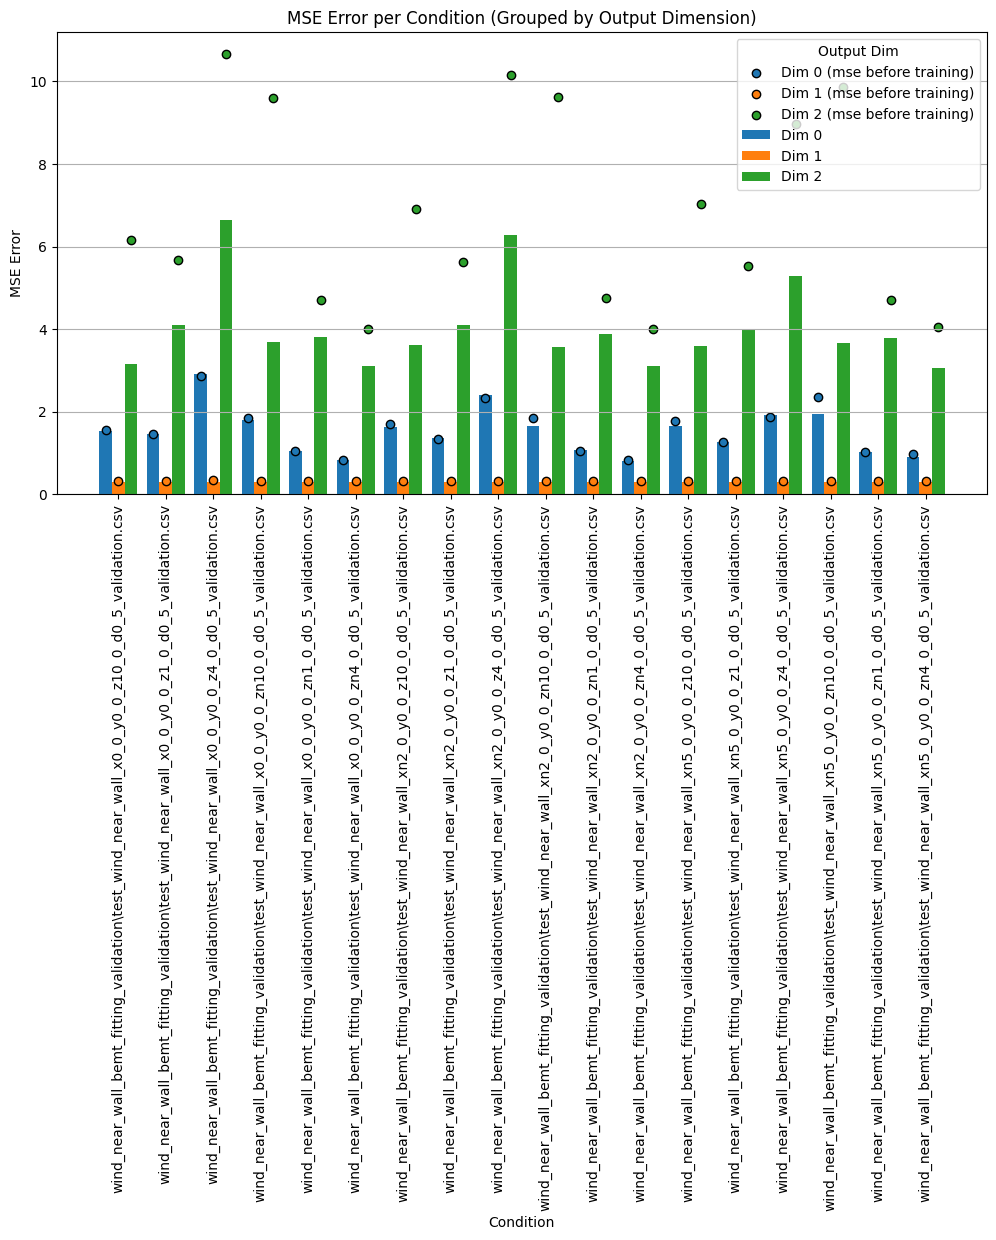

In [5]:
%matplotlib inline
# %matplotlib tk
model_name = training_subfolder

subfolder = validation_subfolder
# subfolder = "wind_near_wall_bemt_fitting_validation"
# subfolder = "nf_validation_back2back"
data_list = generate_data_list(subfolder)
print("test Data List:")
for data in data_list:
    print(data)

# debug
# data_list = data_list[:1]  # use small data list for quick testing
# factory = training_manager.PipelineFactory(training_manager.ModelArchitecture.SIMPLE_NET)
manager = factory.make_test_pipeline()

manager.set_up(
    data_menu=data_list,
    input_label_map_file=path1,
    model_name=model_name
)

# make a new trainer to replicate the above setup, just to allow verify_model to work
manager.test()
plt.show()  
